Enter file/pathname of the first csv file: hi.csv
Pathname entered: hi.csv
(Optional) Enter pathname of second csv file: hi.csv
Pathname entered: hi.csv
Enter the column name for the split into 2 comparative plots: PPOV
Enter the column name of the data to be plotted: PPOV_Female
Split for lower quantile, (median is 0.5): 0.5
Split for upper quantile (median is 0.5): 0.5
Transparency level, (default is 0.5): 
Label x-axis (eg. PPOV_Female by tract) : PPOV_Female by tract
Label y-axis (eg. count): count
Title: Hellooo this is Georgia ACS data on Poverty
Legend label for lower dist (eg. Below Median): Below Med
Legend label for higher dist (eg. Above Median)Above Med
Label the mean line for PPOV_Female, eg. "Mean": Mean
Label the mean line for PPOV_Female, eg. "Median": Median
Filename for output, include png.  eg "povPlot.png"povPlot.png
lower 0.5
alpha 0.5


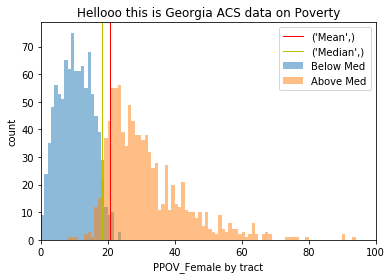

In [15]:
#!/usr/bin/env python3
# kgmcdaid

"""
Title: dataViz_2dist.ipynb
Author: kgmcdaid

This is designed to allow some preliminary visualizations of the processed ACS datasets, 
eg as returned by 'fileCleaning_userfriendly.ipynb' and of the variables within them. 
It plots two distributions of a dataset, looking at effect on the difference in distribution by another factor.

Example: plot percent poverty, but have the dataset split, with one distribution containing census tracts with 
greater than median Highschool attainment, other having less than the median Highschool attainment. 
 These columns are: 
     'PPOV' in the processed Poverty dataset, where headers = True
     'min_HS_25' in the processed Education dataset.
 
Note: This jupyter notebook has been developed with the intention of being usable by those with minimal 
experience coding to use text inputs within the jupyter notebook to specify the route by which the files are processed. 

Packages: pandas, numpy, matplotlib
    
Input:
    One or two csv files containing columns with continuous to plot.
    If two files are chosen, they must have a column in common containing unique identifiers (eg. id). 
    Text inputs from user are required for the parameters.

Output:
    plot is displayed below cell
    png file is saved to directory

TODO:
    Make it so two columns can be simultaneously plotted. 
"""

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

#how do I specify a dataframe with only a subset of the columns? 

def histograms(path1, path2, split, plot, xlabel, ylabel, title, q1, q2, alpha, 
              label_lower, label_higher, label_mean, label_med, output, file=True):
    """Make a histogram plot showing two distributions of a dataset, split by the percentile of the other dataset. 

    Inputs: 
        path1 - str, pathname to csv file
        path2 - str, optional, pathname to csv file
        split - str, Series/column name
        plot - str, Series/column name 
        q1 - float, in range 0-1,
        q2 - float, in range 0-1,
        xlabel - str, x-axis label
        ylabel - str, y-axis label
        title - str, plot title
        alpha - float, optional
        label_lower - str, label the dist below the q1 split
        label_higher - str, label the dist above the q2 split 
        label_mean - str, label for mean line
        label_med - str, label for median line
        file - bool, default True
        output = str, include '.png', filename for output plot

    Output:
        plot is displayed below cell
        png file is saved to directory
        
                
    Example: 
        The census tracts are split into two distributions, depending on whether they lie 
        above or below the median educational attainment of the tract. 
        The distributions of percent poverty are then plotted. 
        This allows examination of the general trend in the differences in poverty rates in tracts 
        above/below median educational attainment. 
        These columns are: 
            'PPOV' in the processed Poverty dataset, where headers = True
            'min_HS_25' in the processed Education dataset.
        
        In this case, possible inputs would be: 
            path1 = name of poverty dataset
            path2 = name of education dataset
            split = min_HS_25
            plot = PPOV
            q1 = 0.5
            q2 = 0.5
            xlabel = % below poverty line in census tract
            ylabel = count of census tracts
            title = % Poverty by education in Georgia - split by median educational attainment
            label_lower = Below Median Poverty
            label_higher = Above Median Poverty
            label_mean = Mean Poverty
            label_med = Median Poverty
            output = pov_eduSplit.png
            
    
        
    Note: 
    If using the files from fileCleaning_userfriendly, can use the descriptive file optionally generated 
    to have a better idea of the distribution and percentiles in the fields chosen to plot. 

    """
    
    path1 = path1
    path2 = path2
    split = split
    plot = plot
    ylabel = ylabel 
    xlabel = xlabel
    output = output
    file = file

    lower = float(q1) if q1 != '' else 0.5
    #print('lower', lower)
    higher = float(q2) if q2 != '' else 0.5
    alpha = float(alpha) if alpha != '' else 0.5
    #print('alpha {}'.format(alpha))

    file_a = pd.read_csv(path1)
    
    if path2 != '' or None:
        file_b = pd.read_csv(path2)
        df = pd.merge(file_a, file_b)
    else:
        df = file_a
    
    v1 = df[split] # splitvalue
    v2 = df[plot]# plotvalue
    min_val = v2.min()
    med_val = v2.median()
    mean_val = v2.mean()

    quantile_low = np.quantile(v1, lower)
    quantile_high = np.quantile(v1, higher)
    series_lower = df[v1 <= quantile_low]
    series_higher = df[v1 > quantile_high]
    
    bin_count = 100-int(min_val)
    range_val = (int(min_val), 100)

    plt.hist(series_lower[plot], bins=bin_count, range=range_val, alpha=alpha, label=label_lower)
    plt.hist(series_higher[plot], bins=bin_count, range=range_val, alpha=alpha, label=label_higher)

    plt.axvline(mean_val, color='r', linestyle='solid', linewidth=1, label=label_mean)
    plt.axvline(med_val, color='y', linestyle='solid', linewidth=1, label=label_med)
    plt.xlim(0,100)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    if file == True: 
        plt.savefig(output)
    
    
#######################

def pathIn(path):
    """Check the pathname for the csv file is valid."""
    
    path = path
    if path == '':
        pathIn()
    else:
        print('Pathname entered: {}'.format(path))
        try:
            pd.read_csv(path)
        except FileNotFoundError:
            print('The file {} was not found. Please enter valid csv pathname.'.format(path))
            path = input('csvFile: ')
            pathIn(path)  
    return path

def strCheck(name):
    """Check that a value has been entered"""
    
    if name == '':
        name = input('Re-enter value')
        strCheck(name)
#######################

def calling():
    """ Obtain valid inputs for the plot and call histograms().
    
    Calls pathIn to check if valid pathnames have been entered for path1, path2
    Calls strCheck to check if values have been entered for split, plot
    
    Inputs: 
        path1 - str, pathname to csv file
        path2 - str, optional, pathname to csv file
        split - str, Series/column name
        plot - str, Series/column name 
        q1 - float, in range 0-1,
        q2 - float, in range 0-1,
        xlabel - str, x-axis label
        ylabel - str, y-axis label
        title - str, plot title
        alpha - float, optional
        label_lower - str ...
        label_higher - str ... 
        label_mean - str, label for mean line
        label_med - str, label for median line
        output = str, include '.png', file for output plot
    """
    
    path1 = input('Enter file/pathname of the first csv file: ')
    pathIn(path1)
    path2 = input('(Optional) Enter pathname of second csv file: ') 
    #path2 not required. Only works if it is a file with a common column... 
    if path2 != '':
        pathIn(path2)
    split = input('Enter the column name for the split into 2 comparative plots: ')
    strCheck(split)
    plot = input('Enter the column name of the data to be plotted: ')
    strCheck(plot)
    q1 = input('Split for lower quantile, (median is 0.5): ') 
    q2 = input('Split for upper quantile (median is 0.5): ')

    #displaying 
    alpha = input("Transparency level, (default is 0.5): ")
    xlabel = input("Label x-axis (eg. {} by tract): ".format(plot))
    strCheck(xlabel)
    ylabel = input("Label y-axis (eg. count): ") 
    strCheck(ylabel)
    title = input("Title: ")
    strCheck(title)
    label_lower = input('Legend label for lower dist (eg. Below Median): ')
    label_higher = input('Legend label for higher dist (eg. Above Median)' )
    label_mean = input('Label the mean line for {}, eg. "Mean": '.format(plot))
    label_med = input('Label the mean line for {}, eg. "Median": '.format(plot))
    output = input('Filename for output, include png.  eg "povPlot.png"')
    
    histograms(path1, path2, split, plot, xlabel, ylabel, title, q1, q2, 
              alpha, label_lower, label_higher, label_mean, label_med, output) 

calling()